### Abdessalam BENAYYAD SSIO

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## </font> <font color = #4854E8> Objective </font>
We will be using tree-based ensemble methods on the [Covertype dataset](https://www.openml.org/d/180).
It contains about 100,000 observations of 7 types of trees (Spruce, Pine, Cottonwood, Aspen,...) described by 55 features describing elevation, distance to water, soil type, etc.

<div>
<img src="./Figures/dataset-cover.jpeg" width="1000"/>
</div>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

We fetch the covertype data from OpenML: https://www.openml.org/d/180

#### <font color = blue>Import the Libraries

In [1]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

%matplotlib inline
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
from tqdm import tqdm, tqdm_notebook
import seaborn as sns # Plotting library, install with 'pip install seaborn'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=39acfb1ccda0a0a6949e24bada196a4897fc97a20e714e391c9140c43369e812
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=610c4671f384fa2687b8fe870d9de68016f7118bef921585546e5bcd38a763b2
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


#### <font color = blue>Import the Dataset

In [2]:
covertype = openml.datasets.get_dataset(180)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array');
# Retrieve class labels for the target variable
classes = covertype.retrieve_class_labels()
# Retrieve feature names from dataset (covertype)
features = [f.name for i,f in covertype.features.items()][:-1]

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-2-2cca2f7aa466>:2: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array');


In [3]:
X

array([[2754.,  146.,    5., ...,    0.,    0.,    0.],
       [3219.,   21.,    8., ...,    0.,    0.,    0.],
       [2965.,  337.,   16., ...,    0.,    0.,    0.],
       ...,
       [2232.,  141.,   32., ...,    0.,    0.,    0.],
       [2221.,  163.,   27., ...,    0.,    0.,    0.],
       [2221.,  150.,   33., ...,    0.,    0.,    0.]], dtype=float32)

In [4]:
y

array([1, 0, 0, ..., 3, 3, 3])

In [5]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

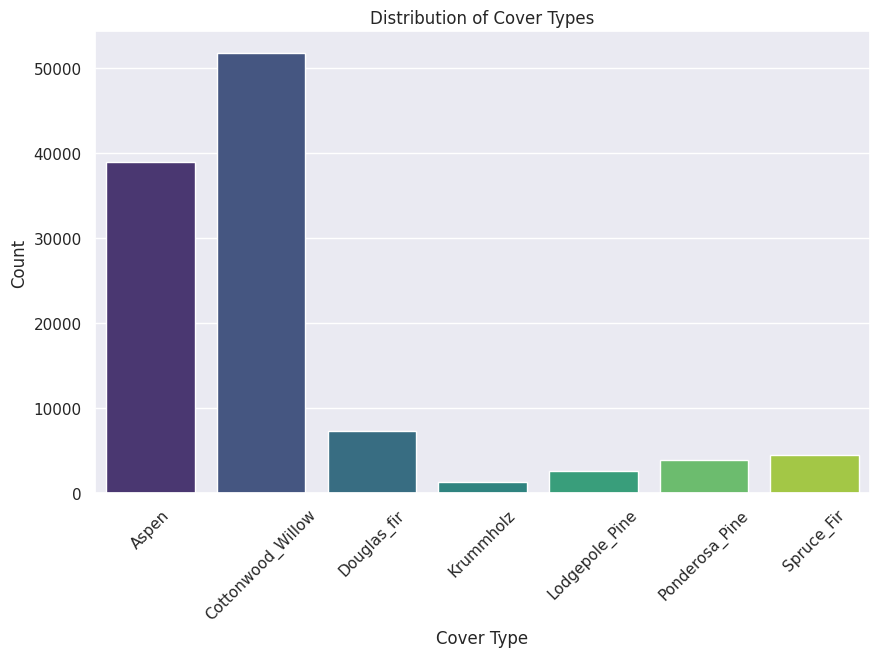

In [6]:
# class distribution :
df_ = pd.DataFrame(X, columns=features)
df_['class'] = [classes[i] for i in y]

# Set the order of classes for better visualization
class_order = classes

# Plot the count of each class
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_, order=class_order, palette='viridis')

plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [7]:
features[0:20]

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4',
 'soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6']

In [8]:
# features number
len(features)

54

In [9]:
# all features
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4',
 'soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 'soil_type_29',
 'soil_type_30',
 'soil_type_31',
 'soil_type_32',
 'soil_type_33',
 'soil_type_34',
 'soil_type_35',
 'soil_type_36',
 'soil_type_37',
 'soil_type_38',
 'soil_type_39',
 'soil_type_40']

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Visualization </font>
To understand the data a bit better, we can use a scatter matrix. From this, it looks like elevation is a relevant feature.
Douglas Fir and Aspen grow at low elevations, while only Krummholz pines survive at very high elevations.

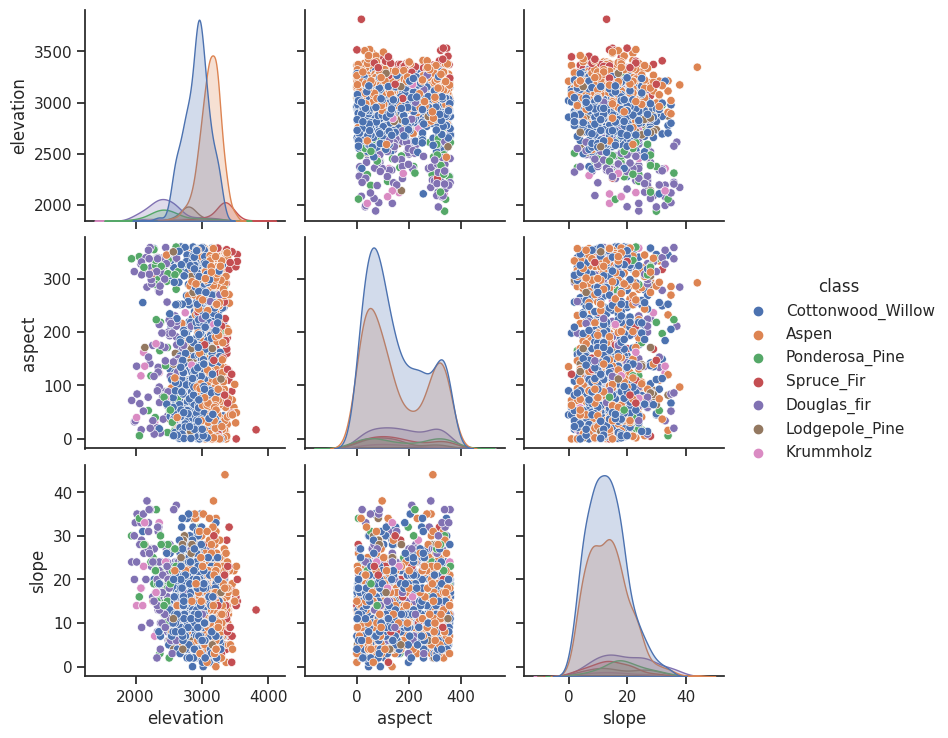

In [10]:
# Using seaborn to build the scatter matrix
# only first 3 columns, first 1500 examples
n_points = 1500
df = pd.DataFrame(X[:n_points,:3], columns=features[:3])
df['class'] = [classes[i] for i in y[:n_points]]
sns.set(style="ticks")
sns.pairplot(df, hue="class");

In [11]:
df.columns

Index(['elevation', 'aspect', 'slope', 'class'], dtype='object')

In [12]:
# exclude target column
df.iloc[:, :-1]

,elevation,aspect,slope
0,2754.0,146.0,5.0
1,3219.0,21.0,8.0
2,2965.0,337.0,16.0
3,2368.0,14.0,15.0
4,2366.0,165.0,3.0
...,...,...,...
1495,3106.0,38.0,16.0
1496,3142.0,312.0,28.0
1497,3244.0,93.0,9.0
1498,3179.0,147.0,30.0


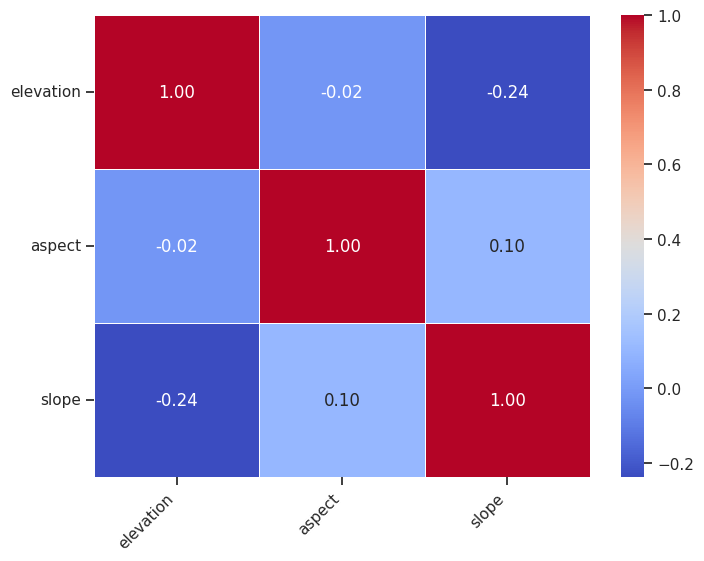

In [13]:
correlation_matrix_subset = df.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

feature_names_subset = df.columns[:-1]

heatmap.set_xticklabels(feature_names_subset, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names_subset, rotation=0)

# Show the plot
plt.show()



![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> </font> <font color = #4854E8> Plotting helpers</font>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [14]:
## Model solution
from IPython import display
def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0,1), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 10))
    ylabel -- the y-axis title
    """
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)

    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)

    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i)
        if i == param_range[0]:
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys():
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 1: Random Forests</font>
Implement a function `evaluate_RF` that measures the performance of a Random Forest Classifier, using trees
of (max) depth 2,8,32,64, for any number of trees in the ensemble (`n_estimators`).
For the evaluation you should measure accuracy using 3-fold cross-validation.
Use `random_state=1` to ensure reproducibility. Finally, plot the results for at least 5 values of `n_estimators` ranging from 1 to 30. You can, of course, reuse code from earlier labs and assignments. Interpret the results.
You can take a 50% subsample to speed the plotti

#### Solution

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [16]:
def evaluate_RF(X, y, n_estimators_values):
    results = []

    for n_estimators in n_estimators_values:
        accuracies = []

        # Loop over different max_depth values
        for max_depth in [2, 8, 32, 64]:
            rf_classifier = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=1
            )

            # 3 fold
            scores = cross_val_score(rf_classifier, X, y, cv=3, scoring='accuracy')
            accuracies.append(scores.mean())

        results.append(accuracies)

    return np.array(results)


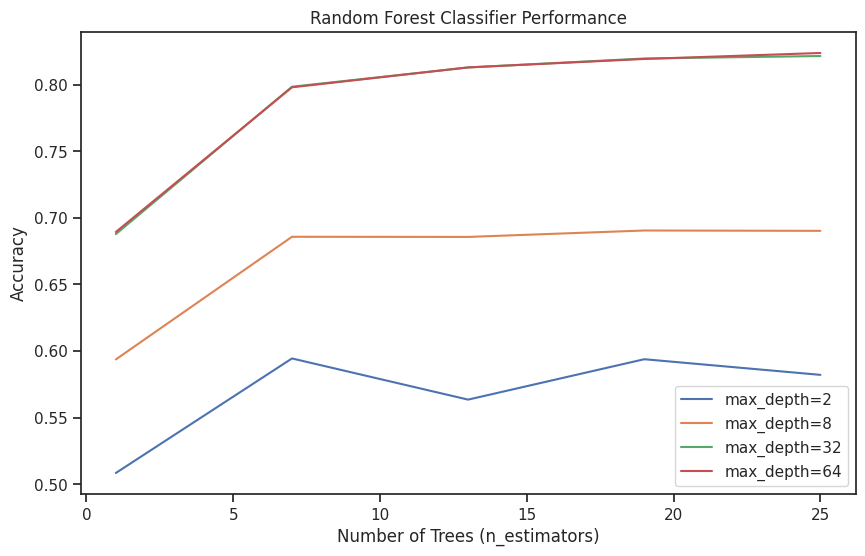

In [17]:
subsample_size = int(0.5 * len(X))
X_subsample = X[:subsample_size]
y_subsample = y[:subsample_size]

n_estimators_values = list(range(1, 31, 6))

results = evaluate_RF(X_subsample, y_subsample, n_estimators_values)

plt.figure(figsize=(10, 6))
for i, max_depth in enumerate([2, 8, 32, 64]):
    plt.plot(n_estimators_values, results[:, i], label=f'max_depth={max_depth}')

plt.title('Random Forest Classifier Performance')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 2:  Other measures</font>
Repeat the same plot but now use balanced_accuracy as the evaluation measure. See the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score).
Only use the optimal max_depth from the previous question. Do you see an important difference?

#### Solution

In [18]:
def evaluate_RF_balanced_accuracy(X, y, n_estimators_values, max_depth):
    results = []

    for n_estimators in n_estimators_values:
        balanced_accuracies = []

        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=1
        )

        scores = cross_val_score(rf_classifier, X, y, cv=3, scoring='balanced_accuracy')
        balanced_accuracies.append(scores.mean())

        results.append(balanced_accuracies)

    return np.array(results)


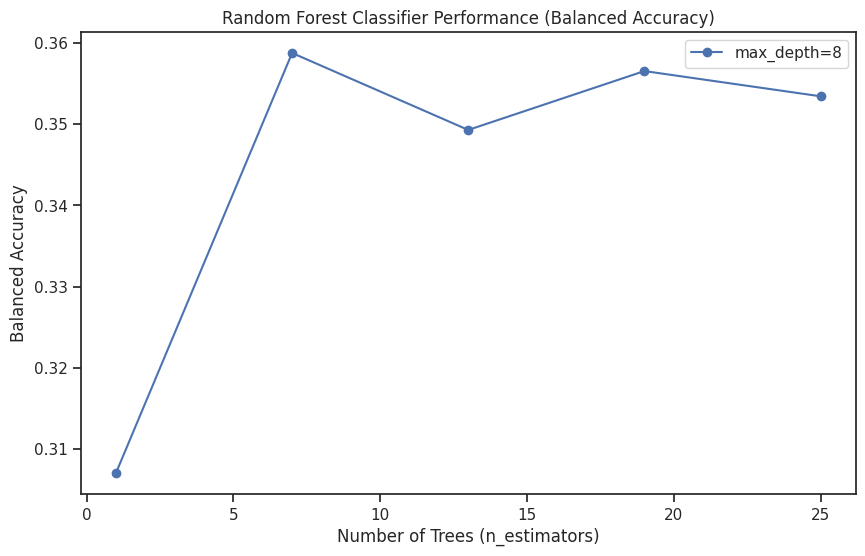

In [19]:
subsample_size = int(0.5 * len(X))
X_subsample = X[:subsample_size]
y_subsample = y[:subsample_size]

optimal_max_depth = 8

n_estimators_values = list(range(1, 31, 6))

results_balanced_accuracy = evaluate_RF_balanced_accuracy(X_subsample, y_subsample, n_estimators_values, optimal_max_depth)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, results_balanced_accuracy, label=f'max_depth={optimal_max_depth}', marker='o')

plt.title('Random Forest Classifier Performance (Balanced Accuracy)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.show()

##### using balanced accuracy is generally a better choice because it provides a more accurate reflection of the model's performance across different classes. It prevents the inflated accuracy that might occur if the model is biased towards the majority class.Which explain the difference between the two plots.In the second plot, we can see that result is very stable. Balanced data increases with the inscrease of trees number

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 3 : Feature importance</font>
Retrieve the feature importances according to the (tuned) random forest model. Which feature are most important?

#### Solution

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Split data : train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


tuned_rf_classifier = RandomForestClassifier(
    n_estimators=15,
    max_depth=8,
    random_state=1
)

# Fit model
tuned_rf_classifier.fit(X_train, y_train)

feature_importances = tuned_rf_classifier.feature_importances_

sorted_feature_indices = np.argsort(feature_importances)[::-1]

##### i choose to plot index of features because they are too long and confused to put them inside the plot but i print name of features instead of indexes

Top 54 most important features:
1. elevation: Feature 0 - Importance 0.45154728852279574
2. wilderness_area4: Feature 13 - Importance 0.11852273327894101
3. Horizontal_Distance_To_Roadways: Feature 5 - Importance 0.045733463836273115
4. Horizontal_Distance_To_Fire_Points: Feature 9 - Importance 0.034685903026629904
5. soil_type_12: Feature 25 - Importance 0.02827407649958501
6. soil_type_22: Feature 35 - Importance 0.02690029754774925
7. wilderness_area1: Feature 10 - Importance 0.02284327095689542
8. wilderness_area3: Feature 12 - Importance 0.01951911144334231
9. soil_type_2: Feature 15 - Importance 0.018933017029577958
10. horizontal_distance_to_hydrology: Feature 3 - Importance 0.018427985006181327
11. Vertical_Distance_To_Hydrology: Feature 4 - Importance 0.01719248946502525
12. wilderness_area2: Feature 11 - Importance 0.016339708458967272
13. soil_type_23: Feature 36 - Importance 0.015983828115988318
14. Hillshade_Noon: Feature 7 - Importance 0.015562319674533113
15. soil_type_1

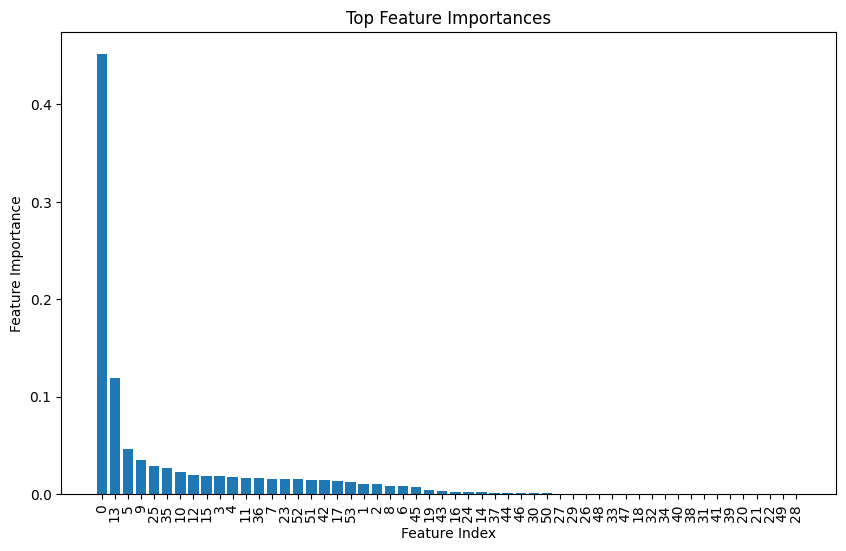

In [6]:
top_n_features = len(features)  # Change as needed
print("Top", top_n_features, "most important features:")
for i in range(top_n_features):
    feature_index = sorted_feature_indices[i]
    importance = feature_importances[feature_index]
    feature_name = features[feature_index]
    print(f"{i + 1}. {feature_name}: Feature {feature_index} - Importance {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n_features), feature_importances[sorted_feature_indices[:top_n_features]])
plt.xticks(range(top_n_features), [f"{feature_index}" for feature_name, feature_index in zip(features, sorted_feature_indices[:top_n_features])], rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importances')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 4 :  Feature selection </font>
Do a standard stratified holdout and generate the confusion matrix of the tuned random forest. Which classes are still often confused?

#### Solution

In [23]:
from sklearn.metrics import confusion_matrix


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

tuned_rf_classifier = RandomForestClassifier(
    n_estimators=15,
    max_depth=8,
    random_state=1
)

# Fit the tuned model to train dataset
tuned_rf_classifier.fit(X_train, y_train)

# Predict on test
y_pred = tuned_rf_classifier.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)



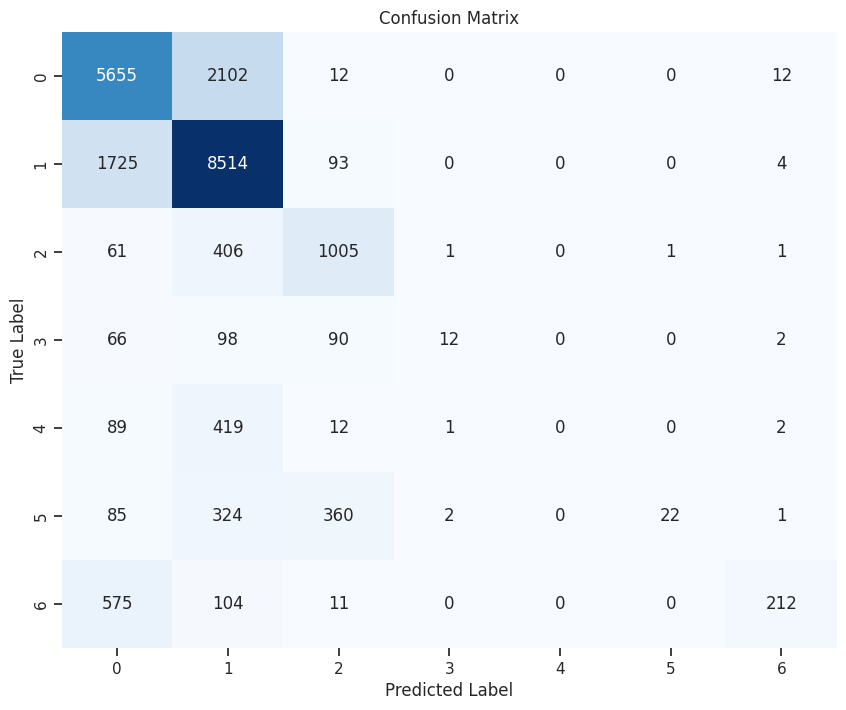

In [25]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 5 : Confusion matrix </font>
Re-build your tuned random forest, but this time only using the first 10 features.
Return both the balanced accuracy and training time. Interpret the results.

#### Solution

In [26]:
X_subset = pd.DataFrame(X).iloc[:, :10]

# Assuming you have a tuned Random Forest model
tuned_rf_classifier_subset = RandomForestClassifier(
    n_estimators=15,
    max_depth=8,
    random_state=1
)

# Measure the training time
start_time = time.time()

balanced_accuracy_subset = cross_val_score(
    tuned_rf_classifier_subset, X_subset, y, cv=3, scoring='balanced_accuracy'
).mean()

training_time_subset = time.time() - start_time

print("Balanced Accuracy:", balanced_accuracy_subset)
print("Training Time seconds:", training_time_subset)

Balanced Accuracy: 0.37956118906035535
Training Time seconds: 4.849038362503052


##### Le temps d'entraînement de 8,13 secondes représente le temps nécessaire pour entraîner le modèle de forêt aléatoire en n'utilisant que les 10 premières fonctionnalités.
##### Une précision équilibrée de 0,38 suggère qu'en moyenne, le modèle se comporte mieux que le hasard dans la classification des instances de toutes les classes.
##### conclusion : il existe un compromis entre la précision équilibrée actuelle du modèle et son temps d'entraînement.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 6 : Gradient Boosting</font>
Implement a function `evaluate_GB` that measures the performance of `GradientBoostingClassifier` or the `XGBoostClassifier` for
different learning rates (0.01, 0.1, 1, and 10). As before, use a 3-fold cross-validation. You can use a 5% stratified sample of the whole dataset.
Finally plot the results for `n_estimators` ranging from 1 to 100. Run all the GBClassifiers with `random_state=1` to ensure reproducibility.

#### Solution

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit


def evaluate_GB(X, y, classifier='GradientBoosting', learning_rates=[0.01, 0.1, 1, 10], n_estimators_range=range(1, 101)):
    results = {}

    for lr in learning_rates:
        if classifier == 'GradientBoosting':
            gb_classifier = GradientBoostingClassifier(learning_rate=lr, random_state=1)
        elif classifier == 'XGBoost':
            gb_classifier = XGBClassifier(learning_rate=lr, random_state=1)
        else:
            raise ValueError("Invalid classifier. Use 'GradientBoosting' or 'XGBoost'.")

        # 3-fold and a 5% stratified
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.05, random_state=1)

        # accuracy for n_estimators
        accuracy_scores = []
        for n_estimators in n_estimators_range:
            gb_classifier.set_params(n_estimators=n_estimators)
            scores = cross_val_score(gb_classifier, X, y, cv=cv, scoring='accuracy')
            accuracy_scores.append(np.mean(scores))

        results[lr] = accuracy_scores

    return results

In [29]:
X.shape

(110393, 54)

In [32]:
y.shape

(110393,)

In [ ]:
classifier_type = 'XGBoost'

results = evaluate_GB(X, y, classifier=classifier_type)

plt.figure(figsize=(10, 6))
for lr, scores in results.items():
    downsampled_scores = scores[::5]
    downsampled_n_estimators = list(range(1, 101, 5))

    plt.plot(downsampled_n_estimators, downsampled_scores, label=f'Learning Rate = {lr}')

plt.xlabel('Number of Estimators (Downsampled)')
plt.ylabel('Accuracy')
plt.title(f'Performance of {classifier_type} for Different Learning Rates (Optimized)')
plt.legend()
plt.show()

In [ ]:
classifier_type = 'GradientBoosting'

results = evaluate_GB(X, y, classifier=classifier_type)

plt.figure(figsize=(10, 6))
for lr, scores in results.items():
    downsampled_scores = scores[::5]
    downsampled_n_estimators = list(range(1, 101, 5))

    plt.plot(downsampled_n_estimators, downsampled_scores, label=f'Learning Rate = {lr}')

plt.xlabel('Number of Estimators (Downsampled)')
plt.ylabel('Accuracy')
plt.title(f'Performance of {classifier_type} for Different Learning Rates (Optimized)')
plt.legend()
plt.show()